<h2>Урок 2<h2/>

In [43]:
!pip install keras

In [44]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np

import keras

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
keras.backend.backend()

'tensorflow'

In [4]:
from keras.datasets import fashion_mnist

In [5]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

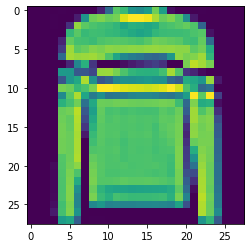

In [7]:
plt.imshow(train_images[5,:,:])
plt.show()

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_images = train_images / 255
test_images = test_images / 255

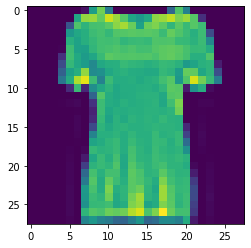

In [10]:
plt.imshow(train_images[10,:,:])
plt.show()

In [11]:
train_images[1,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [12]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [13]:
train_images.shape[1]

784

In [14]:
len(np.unique(train_labels))

10

In [21]:
def NNCategoricalCrossentropy(train, train_labels, test, test_labels, elements, layers, activation_, optimizes_, metric_, epochs_, batch_size_):
    name_ = name=f'model_{elements}_{layers}_{activation_}_{optimizes_}_{"_".join(map(str,metric_))}'
    print(name_)
    model = Sequential(name=name_)
    model.add(Dense(elements, activation='relu', input_shape=(train.shape[1],)))
    unique_labels = len(np.unique(train_labels))
    for k in range(layers):
        el = ((elements - unique_labels) / layers) * (layers - k) + unique_labels
        model.add(Dense(el, activation=activation_))
    model.add(Dense(unique_labels, activation='softmax')) 
    model.compile(
        optimizer=optimizes_, # оптимизатор
        loss=keras.losses.CategoricalCrossentropy(), # функция потерь
        metrics=metric_,
    ) 
    
    hh = model.fit(  
        train_images[:,:],
        to_categorical(train_labels)[:,:],
        epochs=epochs_,
        batch_size=batch_size_, validation_split=0.2
    )

    # Evaluate the model.
    model.evaluate( 
        test_images,
        to_categorical(test_labels)
    )
    
    predictions = np.argmax(model.predict(test), axis=1)
    acc = accuracy_score(test_labels, predictions)
    conf_m = confusion_matrix(test_labels, predictions)
    
    print(f'accuracy_score: {acc}, confusion_matrix:')
    print(conf_m)
    print()
    return [name_, model, hh, conf_m, acc]

In [22]:
list_model = []
for u in [32]:
    for l in [2, 3, 5, 10]:
        for act in ["tanh","relu","sigmoid"]:
            for opt in ["sgd", "adam", "rmsprop"]:
                for metr in [["accuracy"]]:
                    nn = NNCategoricalCrossentropy(train_images, train_labels, test_images, test_labels, u, l, act, opt, metr, 15, 128)
                                        
                    list_model.append(nn)

model_32_2_tanh_sgd_accuracy
Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 1.9227 - accuracy: 0.3416 - val_loss: 1.2211 - val_accuracy: 0.6577
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 1.1251 - accuracy: 0.6771 - val_loss: 0.8899 - val_accuracy: 0.7372
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.8521 - accuracy: 0.7462 - val_loss: 0.7373 - val_accuracy: 0.7721
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.7137 - accuracy: 0.7794 - val_loss: 0.6536 - val_accuracy: 0.7933
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.6406 - accuracy: 0.7983 - val_loss: 0.6004 - val_accuracy: 0.8039
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.5917 - accuracy: 0.8085 - val_loss: 0.5648 - val_accuracy: 0.8097
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 0.5496 - accuracy: 0.8181 - val_loss: 0.5353 

375/375 [==============================] - 2s 4ms/step - loss: 1.8924 - accuracy: 0.2749 - val_loss: 0.9600 - val_accuracy: 0.6341
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.8964 - accuracy: 0.6551 - val_loss: 0.7663 - val_accuracy: 0.7094
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.7469 - accuracy: 0.7167 - val_loss: 0.6865 - val_accuracy: 0.7501
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.6664 - accuracy: 0.7557 - val_loss: 0.6372 - val_accuracy: 0.7672
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.6133 - accuracy: 0.7826 - val_loss: 0.5877 - val_accuracy: 0.7937
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.5692 - accuracy: 0.8031 - val_loss: 0.5503 - val_accuracy: 0.8067
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 0.5418 - accuracy: 0.8089 - val_loss: 0.5346 - val_accuracy: 0.8112
Epoch 8/15
375/37

375/375 [==============================] - 2s 4ms/step - loss: 2.4069 - accuracy: 0.1232 - val_loss: 2.2676 - val_accuracy: 0.2660
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 2.2562 - accuracy: 0.2723 - val_loss: 2.2146 - val_accuracy: 0.2920
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 2.1983 - accuracy: 0.2962 - val_loss: 2.1311 - val_accuracy: 0.3452
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 2.1051 - accuracy: 0.3446 - val_loss: 2.0164 - val_accuracy: 0.3469
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 1.9870 - accuracy: 0.3629 - val_loss: 1.8853 - val_accuracy: 0.3781
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 1.8571 - accuracy: 0.3918 - val_loss: 1.7550 - val_accuracy: 0.4416
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 1.7296 - accuracy: 0.4519 - val_loss: 1.6374 - val_accuracy: 0.4881
Epoch 8/15
375/37

375/375 [==============================] - 2s 5ms/step - loss: 1.8638 - accuracy: 0.4370 - val_loss: 1.1190 - val_accuracy: 0.6910
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 1.0251 - accuracy: 0.7112 - val_loss: 0.8191 - val_accuracy: 0.7536
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.7862 - accuracy: 0.7618 - val_loss: 0.6945 - val_accuracy: 0.7827
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.6753 - accuracy: 0.7902 - val_loss: 0.6182 - val_accuracy: 0.8004
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.5991 - accuracy: 0.8120 - val_loss: 0.5670 - val_accuracy: 0.8149
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.5526 - accuracy: 0.8218 - val_loss: 0.5371 - val_accuracy: 0.8177
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.5267 - accuracy: 0.8276 - val_loss: 0.5112 - val_accuracy: 0.8276
Epoch 8/15
375/37

375/375 [==============================] - 2s 5ms/step - loss: 2.1807 - accuracy: 0.1559 - val_loss: 1.3460 - val_accuracy: 0.5752
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 1.1281 - accuracy: 0.6080 - val_loss: 0.8108 - val_accuracy: 0.7022
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.7853 - accuracy: 0.7142 - val_loss: 0.6851 - val_accuracy: 0.7515
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.6735 - accuracy: 0.7597 - val_loss: 0.6223 - val_accuracy: 0.7792
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.6179 - accuracy: 0.7803 - val_loss: 0.5882 - val_accuracy: 0.7871
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.5673 - accuracy: 0.8032 - val_loss: 0.5652 - val_accuracy: 0.7974
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.5486 - accuracy: 0.8087 - val_loss: 0.5465 - val_accuracy: 0.8099
Epoch 8/15
375/37

375/375 [==============================] - 2s 5ms/step - loss: 2.3311 - accuracy: 0.0985 - val_loss: 2.3007 - val_accuracy: 0.1003
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 2.3000 - accuracy: 0.1112 - val_loss: 2.2983 - val_accuracy: 0.1549
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 2.2980 - accuracy: 0.1518 - val_loss: 2.2964 - val_accuracy: 0.2055
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 2.2959 - accuracy: 0.2253 - val_loss: 2.2940 - val_accuracy: 0.1942
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 2.2933 - accuracy: 0.1795 - val_loss: 2.2909 - val_accuracy: 0.3100
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 2.2902 - accuracy: 0.2557 - val_loss: 2.2872 - val_accuracy: 0.2965
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 2.2864 - accuracy: 0.2869 - val_loss: 2.2824 - val_accuracy: 0.4175
Epoch 8/15
375/37

375/375 [==============================] - 3s 5ms/step - loss: 1.9211 - accuracy: 0.3293 - val_loss: 1.2862 - val_accuracy: 0.6049
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 1.1972 - accuracy: 0.6594 - val_loss: 0.9662 - val_accuracy: 0.7372
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.9119 - accuracy: 0.7461 - val_loss: 0.7605 - val_accuracy: 0.7784
Epoch 4/15
375/375 [==============================] - 2s 4ms/step - loss: 0.7302 - accuracy: 0.7878 - val_loss: 0.6528 - val_accuracy: 0.7999
Epoch 5/15
375/375 [==============================] - 2s 4ms/step - loss: 0.6313 - accuracy: 0.8054 - val_loss: 0.5883 - val_accuracy: 0.8103
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.5709 - accuracy: 0.8184 - val_loss: 0.5490 - val_accuracy: 0.8214
Epoch 7/15
375/375 [==============================] - 2s 4ms/step - loss: 0.5383 - accuracy: 0.8259 - val_loss: 0.5207 - val_accuracy: 0.8282
Epoch 8/15
375/37

375/375 [==============================] - 3s 5ms/step - loss: 2.1741 - accuracy: 0.1553 - val_loss: 1.5110 - val_accuracy: 0.4180
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 1.3004 - accuracy: 0.4995 - val_loss: 0.9837 - val_accuracy: 0.6264
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.9238 - accuracy: 0.6573 - val_loss: 0.8161 - val_accuracy: 0.7025
Epoch 4/15
375/375 [==============================] - 2s 4ms/step - loss: 0.8219 - accuracy: 0.7089 - val_loss: 0.7088 - val_accuracy: 0.7432
Epoch 5/15
375/375 [==============================] - 2s 4ms/step - loss: 0.6853 - accuracy: 0.7542 - val_loss: 0.6583 - val_accuracy: 0.7620
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.6320 - accuracy: 0.7758 - val_loss: 0.6077 - val_accuracy: 0.7873
Epoch 7/15
375/375 [==============================] - 2s 4ms/step - loss: 0.5898 - accuracy: 0.7930 - val_loss: 0.5631 - val_accuracy: 0.7993
Epoch 8/15
375/37

375/375 [==============================] - 3s 5ms/step - loss: 2.3816 - accuracy: 0.0992 - val_loss: 2.3083 - val_accuracy: 0.0957
Epoch 2/15
375/375 [==============================] - 2s 4ms/step - loss: 2.3055 - accuracy: 0.0979 - val_loss: 2.3029 - val_accuracy: 0.0957
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 5/15
375/375 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.1023 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 2.3026 - accuracy: 0.1024 - val_loss: 2.3025 - val_accuracy: 0.1163
Epoch 7/15
375/375 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1008
Epoch 8/15
375/37

375/375 [==============================] - 4s 7ms/step - loss: 2.0243 - accuracy: 0.2930 - val_loss: 1.4925 - val_accuracy: 0.4635
Epoch 2/15
375/375 [==============================] - 2s 6ms/step - loss: 1.4040 - accuracy: 0.5081 - val_loss: 1.1896 - val_accuracy: 0.6168
Epoch 3/15
375/375 [==============================] - 2s 6ms/step - loss: 1.1393 - accuracy: 0.6288 - val_loss: 1.0025 - val_accuracy: 0.6851
Epoch 4/15
375/375 [==============================] - 2s 6ms/step - loss: 0.9664 - accuracy: 0.6911 - val_loss: 0.8704 - val_accuracy: 0.7353
Epoch 5/15
375/375 [==============================] - 2s 6ms/step - loss: 0.8421 - accuracy: 0.7445 - val_loss: 0.7832 - val_accuracy: 0.7657
Epoch 6/15
375/375 [==============================] - 2s 6ms/step - loss: 0.7473 - accuracy: 0.7774 - val_loss: 0.6980 - val_accuracy: 0.7862
Epoch 7/15
375/375 [==============================] - 2s 6ms/step - loss: 0.6782 - accuracy: 0.7890 - val_loss: 0.6476 - val_accuracy: 0.7957
Epoch 8/15
375/37

375/375 [==============================] - 4s 7ms/step - loss: 2.2989 - accuracy: 0.1613 - val_loss: 2.2722 - val_accuracy: 0.2077
Epoch 2/15
375/375 [==============================] - 2s 6ms/step - loss: 2.2279 - accuracy: 0.2086 - val_loss: 1.9998 - val_accuracy: 0.2305
Epoch 3/15
375/375 [==============================] - 2s 6ms/step - loss: 1.9527 - accuracy: 0.2523 - val_loss: 1.7352 - val_accuracy: 0.3243
Epoch 4/15
375/375 [==============================] - 2s 6ms/step - loss: 1.6200 - accuracy: 0.3990 - val_loss: 1.3266 - val_accuracy: 0.4579
Epoch 5/15
375/375 [==============================] - 2s 6ms/step - loss: 1.1265 - accuracy: 0.5637 - val_loss: 0.9326 - val_accuracy: 0.6511
Epoch 6/15
375/375 [==============================] - 2s 6ms/step - loss: 0.8887 - accuracy: 0.6406 - val_loss: 0.7347 - val_accuracy: 0.7023
Epoch 7/15
375/375 [==============================] - 2s 6ms/step - loss: 0.7694 - accuracy: 0.6855 - val_loss: 0.7333 - val_accuracy: 0.7073
Epoch 8/15
375/37

375/375 [==============================] - 3s 7ms/step - loss: 2.3477 - accuracy: 0.1000 - val_loss: 2.3043 - val_accuracy: 0.1030
Epoch 2/15
375/375 [==============================] - 2s 6ms/step - loss: 2.3038 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1030
Epoch 3/15
375/375 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3027 - val_accuracy: 0.1003
Epoch 4/15
375/375 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.0957
Epoch 5/15
375/375 [==============================] - 2s 6ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 2.3026 - accuracy: 0.1014 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 7/15
375/375 [==============================] - 2s 6ms/step - loss: 2.3026 - accuracy: 0.1009 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 8/15
375/37

In [26]:
for m in list_model:
    print(m[0])
    print(f'Точность {m[4]}. Матрица ошибок:')
    print(m[3])
    print()

model_32_2_tanh_sgd_accuracy
Точность 0.8378. Матрица ошибок:
[[845   3  19  45   3   2  66   0  17   0]
 [  3 951  12  26   5   0   2   0   1   0]
 [ 20   0 796  13 103   0  54   0  14   0]
 [ 39  17  15 852  35   0  38   0   4   0]
 [  2   2 162  38 720   0  68   0   8   0]
 [  0   0   0   1   0 931   0  43   5  20]
 [200   2 155  33  93   0 486   0  31   0]
 [  0   0   0   0   0  38   0 938   0  24]
 [  3   1  16   9   3   3  17   5 943   0]
 [  0   0   0   0   0  28   0  55   1 916]]

model_32_2_tanh_adam_accuracy
Точность 0.8772. Матрица ошибок:
[[873   2  23  28   2   2  60   0  10   0]
 [  3 966   1  23   4   0   3   0   0   0]
 [ 14   0 837  17  67   0  65   0   0   0]
 [ 27   7  10 896  46   0  10   0   4   0]
 [  2   1 145  26 776   0  49   0   1   0]
 [  0   0   0   1   0 953   0  25   2  19]
 [179   2  97  39  61   0 610   0  12   0]
 [  0   0   0   0   0  19   0 947   1  33]
 [  4   0  12   4   4   3  10   4 959   0]
 [  0   0   0   0   0  11   1  33   0 955]]

model_32_2_

In [23]:
bestmodel = 0
bestacc = 0
for m in list_model:
    if m[4] > bestacc:
        bestacc = m[4]
        bestmodel = m

print(f'Лучшая модель {bestmodel[0]} c точностью {bestmodel[4]}')

Лучшая модель model_32_2_tanh_adam_accuracy c точностью 0.8772


model_32_2_tanh_sgd_accuracy - 0.8378


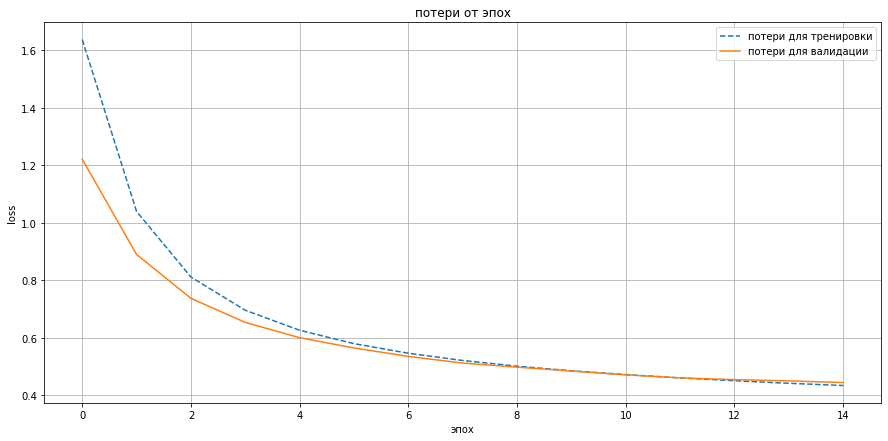

model_32_2_tanh_adam_accuracy - 0.8772


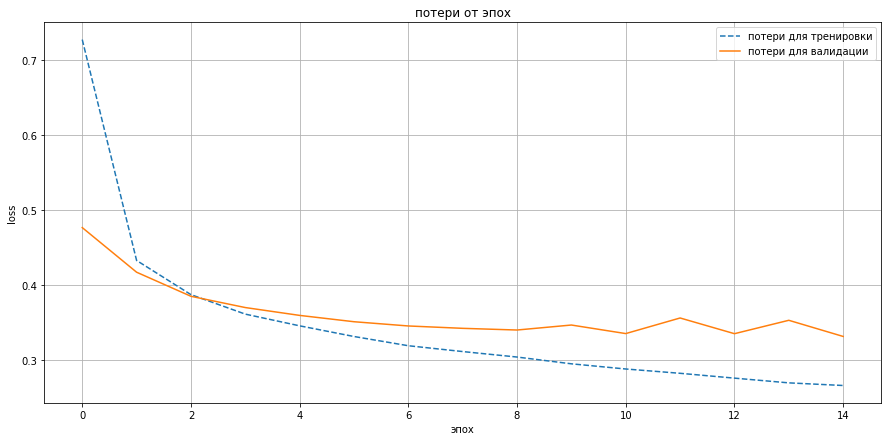

model_32_2_tanh_rmsprop_accuracy - 0.8661


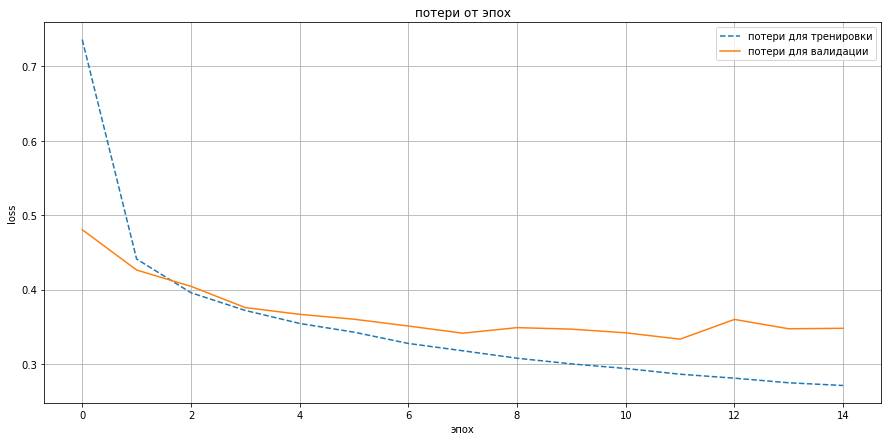

model_32_2_relu_sgd_accuracy - 0.8193


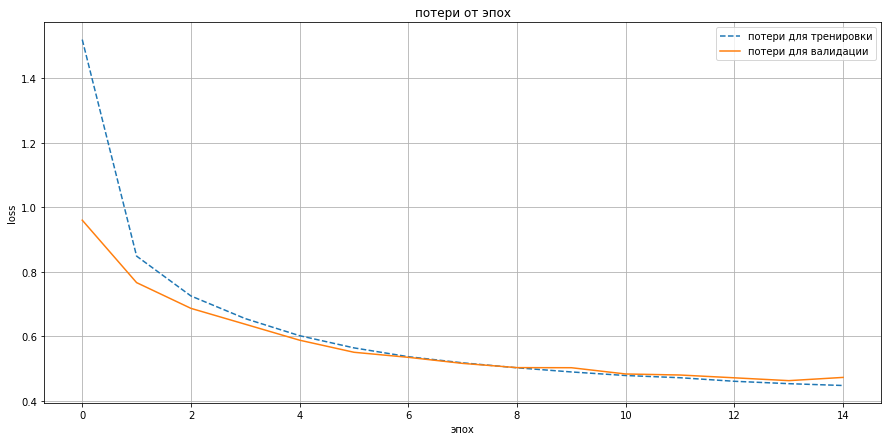

model_32_2_relu_adam_accuracy - 0.8697


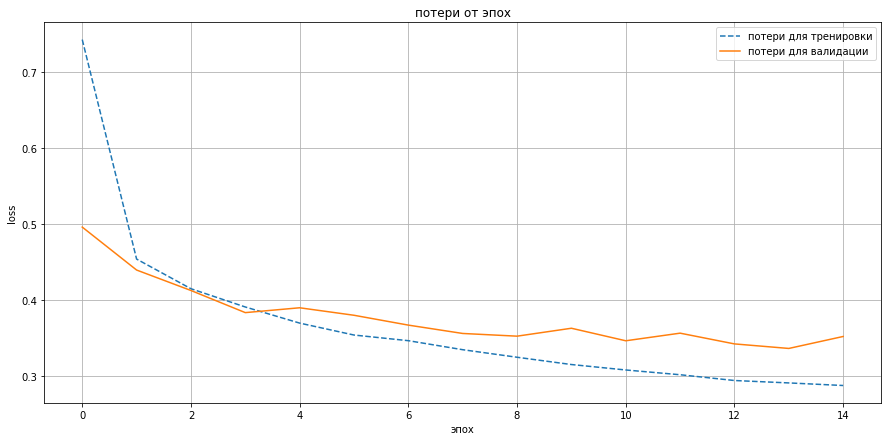

model_32_2_relu_rmsprop_accuracy - 0.8713


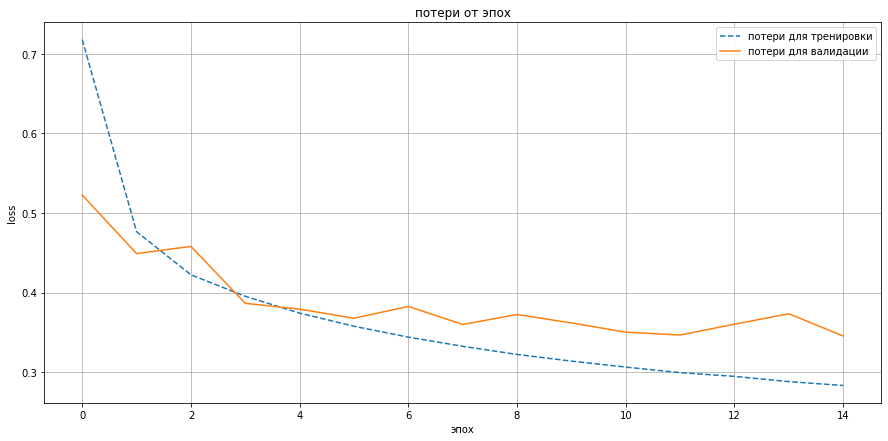

model_32_2_sigmoid_sgd_accuracy - 0.595


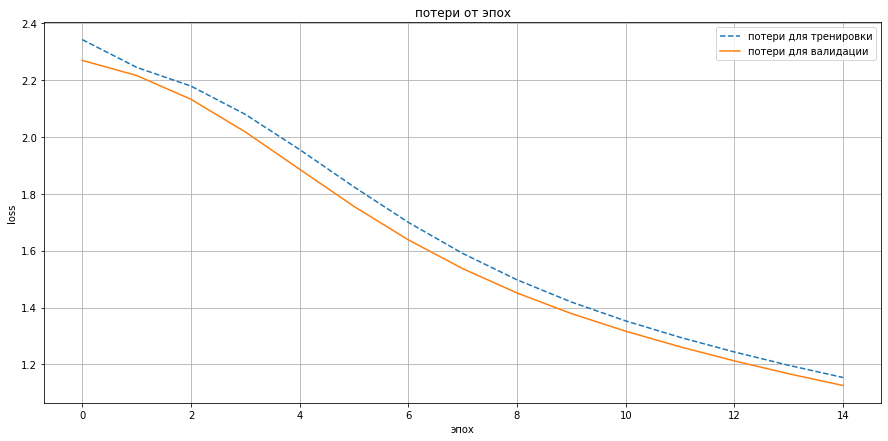

model_32_2_sigmoid_adam_accuracy - 0.8683


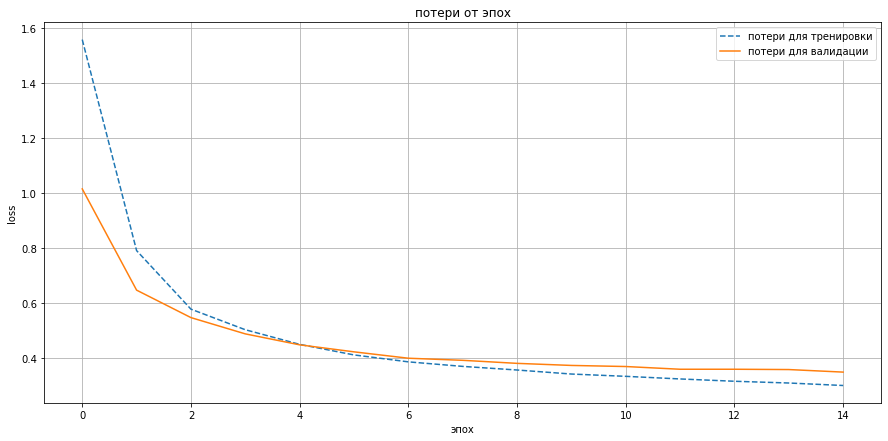

model_32_2_sigmoid_rmsprop_accuracy - 0.8603


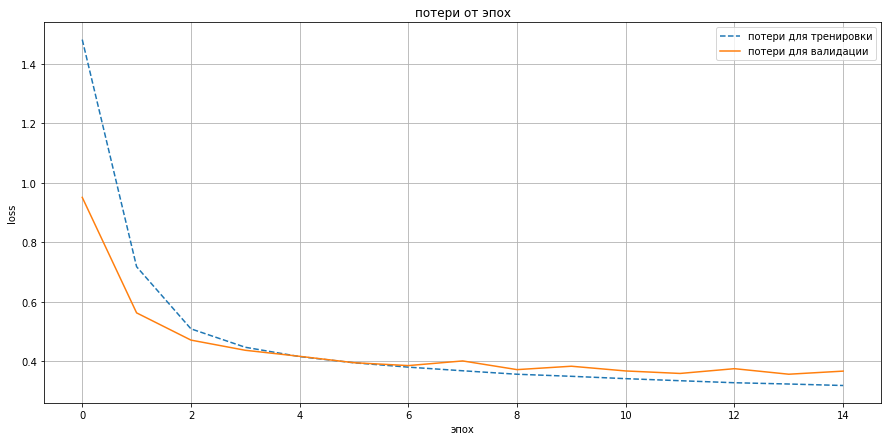

model_32_3_tanh_sgd_accuracy - 0.8409


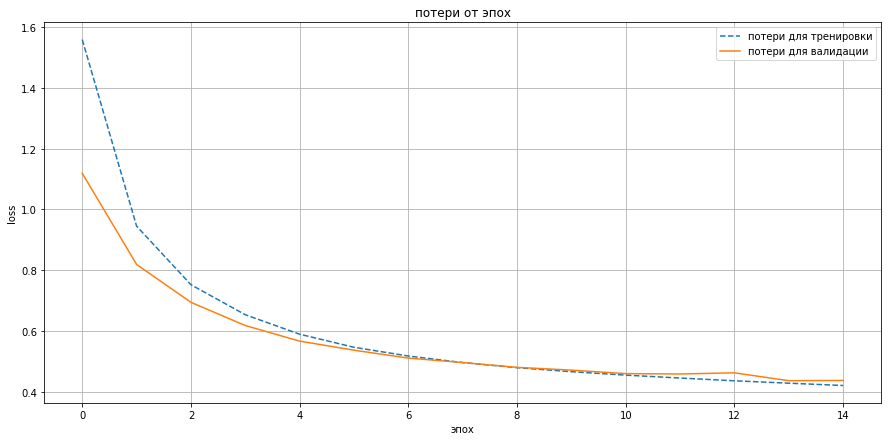

model_32_3_tanh_adam_accuracy - 0.8733


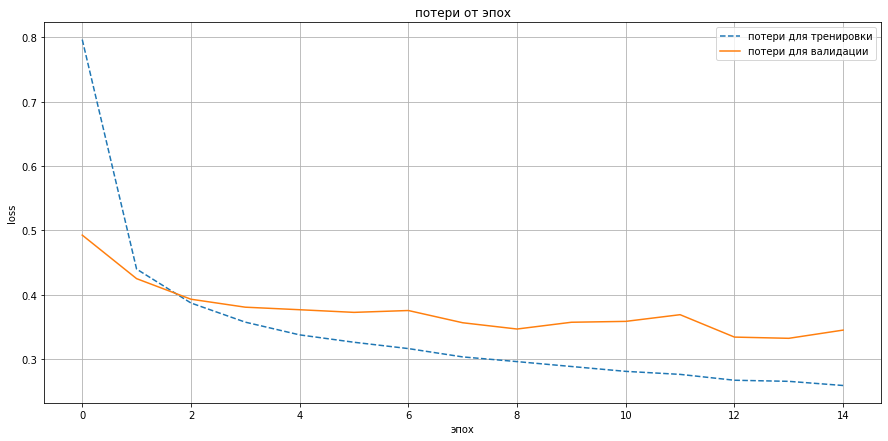

model_32_3_tanh_rmsprop_accuracy - 0.8592


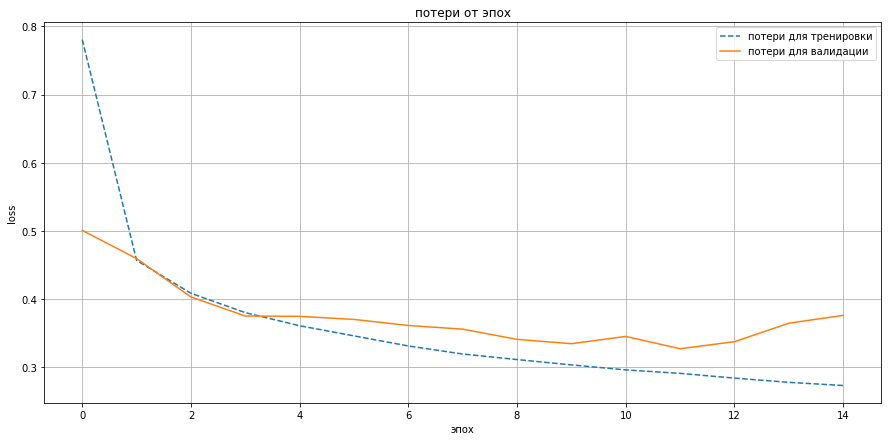

model_32_3_relu_sgd_accuracy - 0.8366


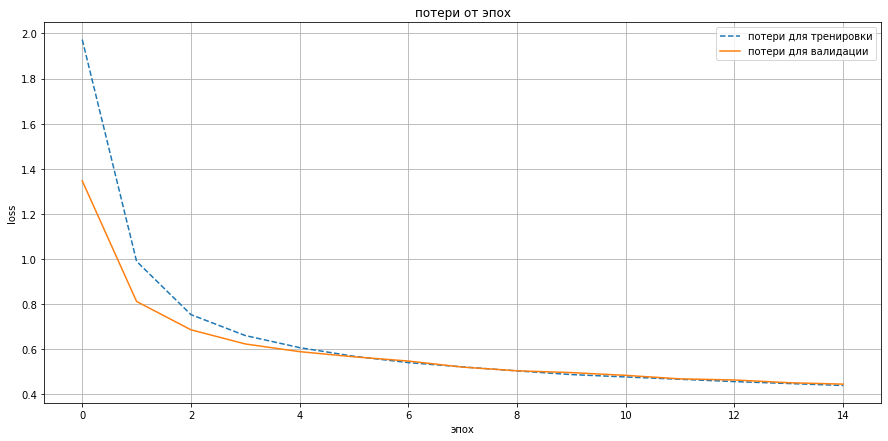

model_32_3_relu_adam_accuracy - 0.8712


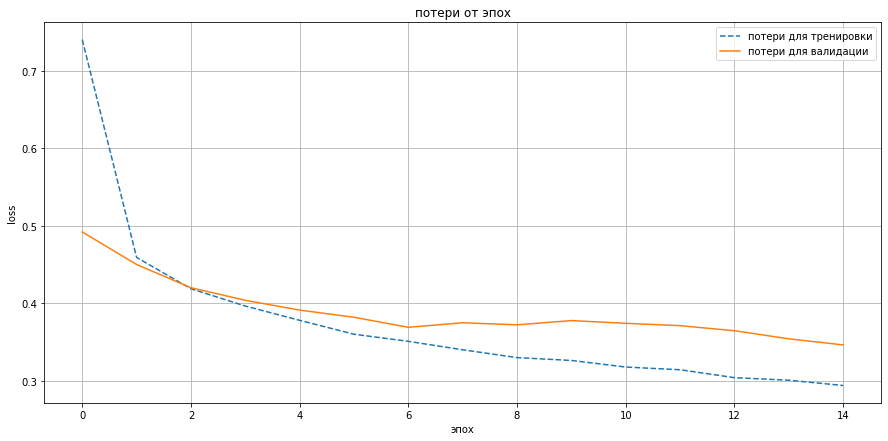

model_32_3_relu_rmsprop_accuracy - 0.8626


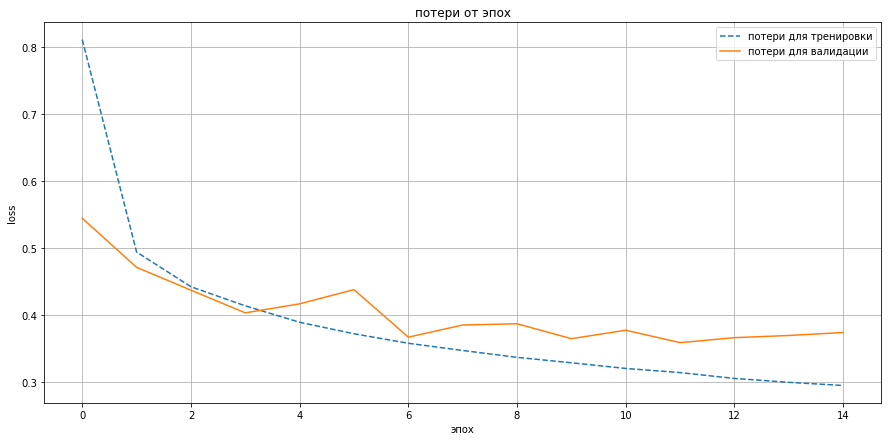

model_32_3_sigmoid_sgd_accuracy - 0.2735


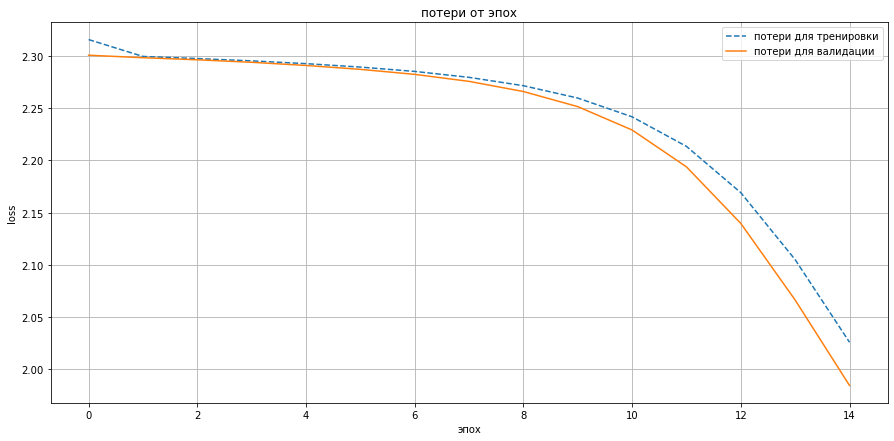

model_32_3_sigmoid_adam_accuracy - 0.858


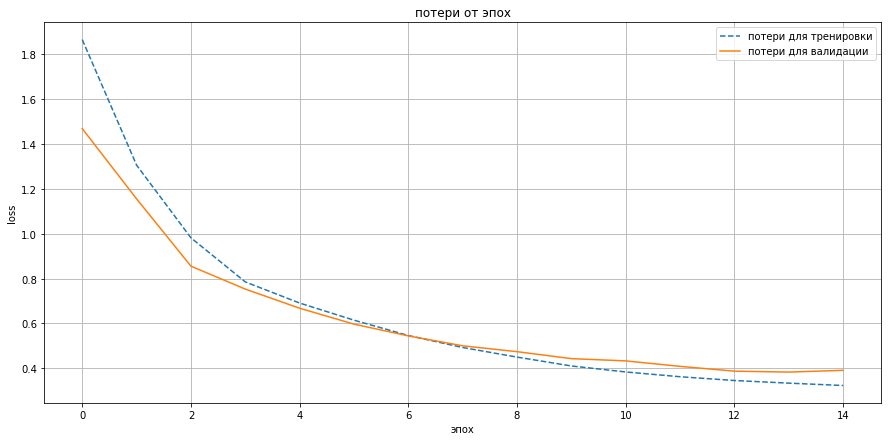

model_32_3_sigmoid_rmsprop_accuracy - 0.8516


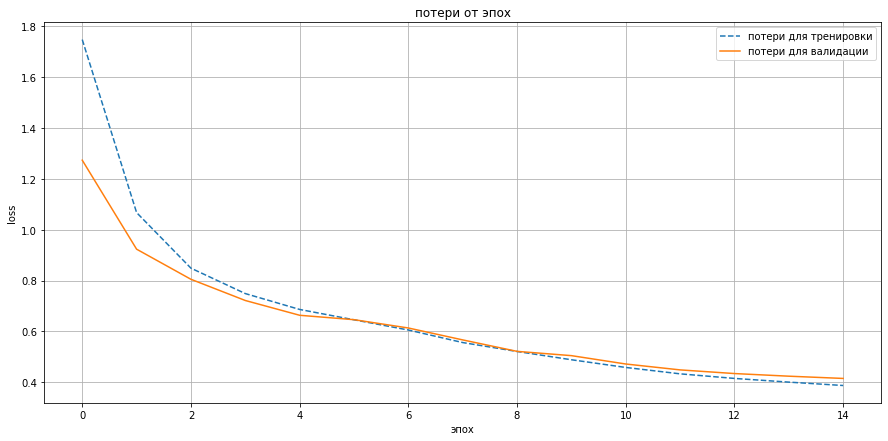

model_32_5_tanh_sgd_accuracy - 0.8477


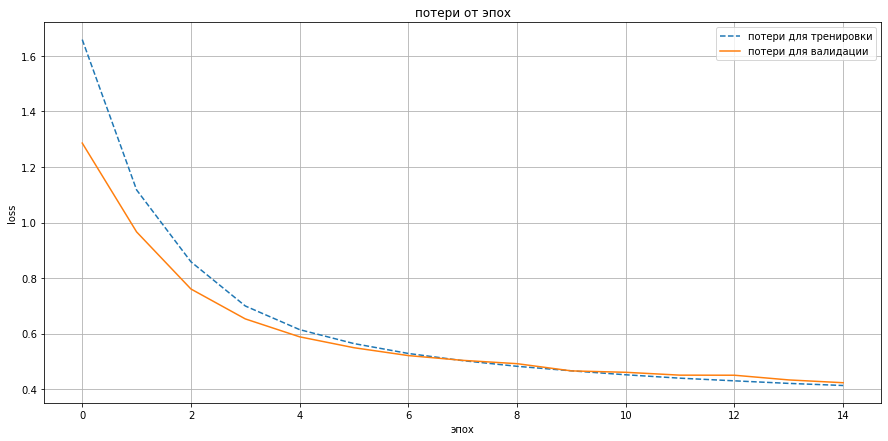

model_32_5_tanh_adam_accuracy - 0.8694


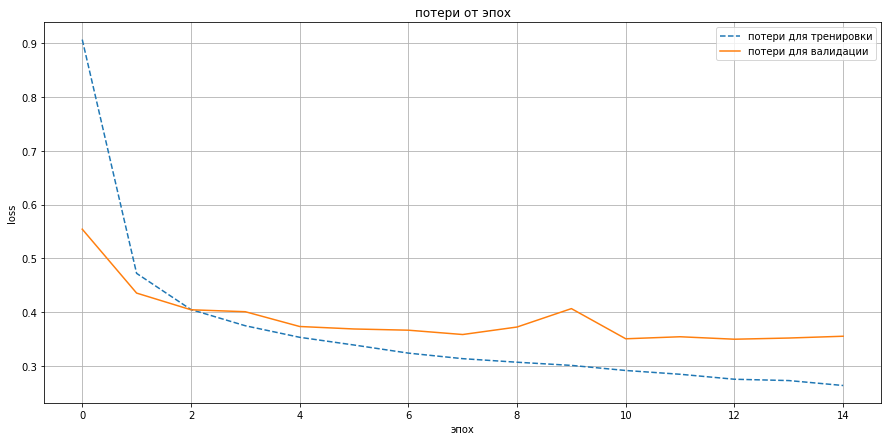

model_32_5_tanh_rmsprop_accuracy - 0.8704


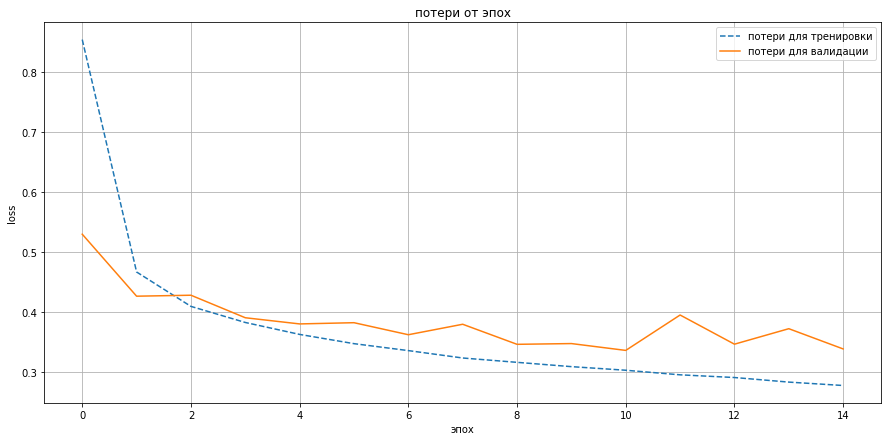

model_32_5_relu_sgd_accuracy - 0.8335


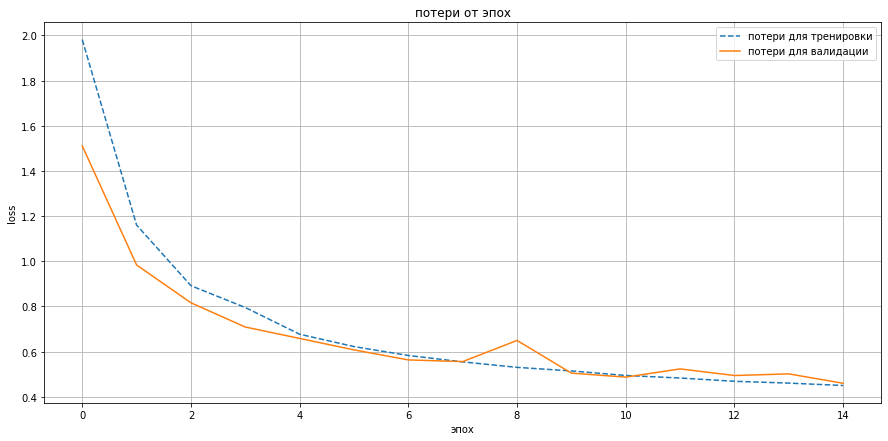

model_32_5_relu_adam_accuracy - 0.8612


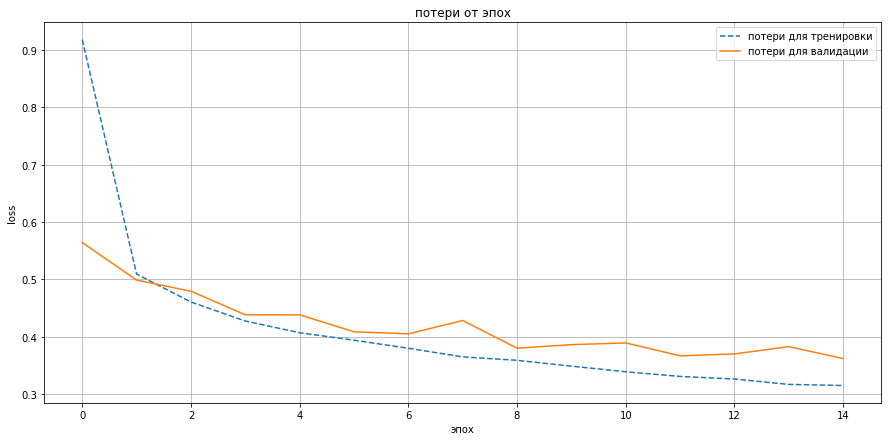

model_32_5_relu_rmsprop_accuracy - 0.8612


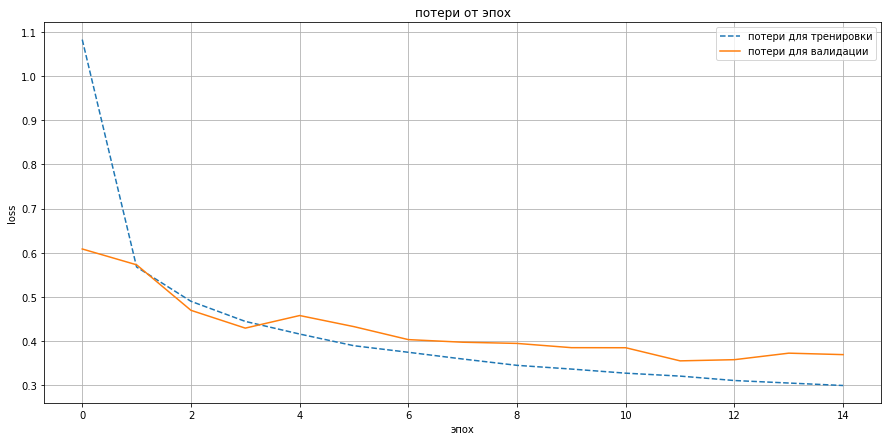

model_32_5_sigmoid_sgd_accuracy - 0.1


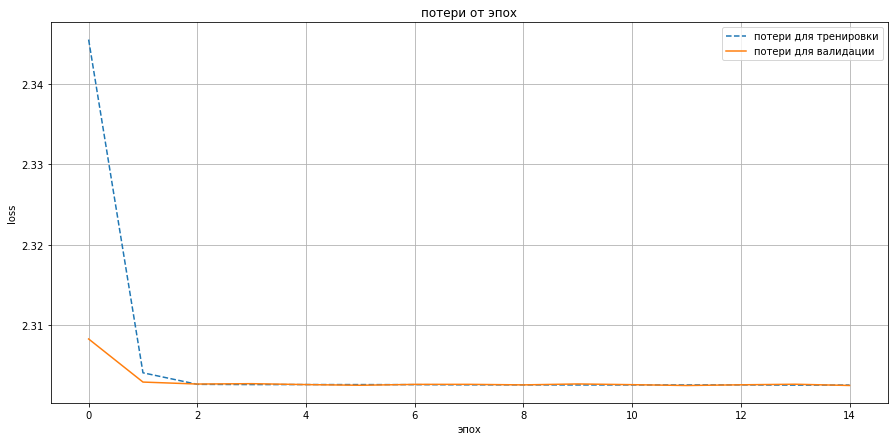

model_32_5_sigmoid_adam_accuracy - 0.8047


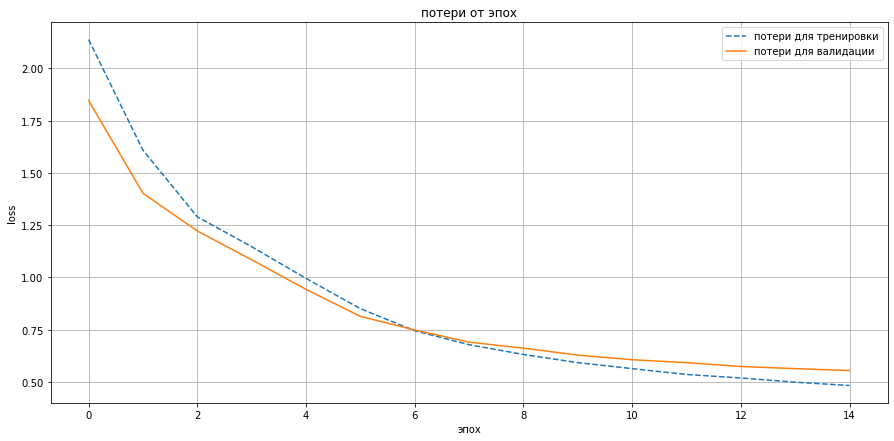

model_32_5_sigmoid_rmsprop_accuracy - 0.8296


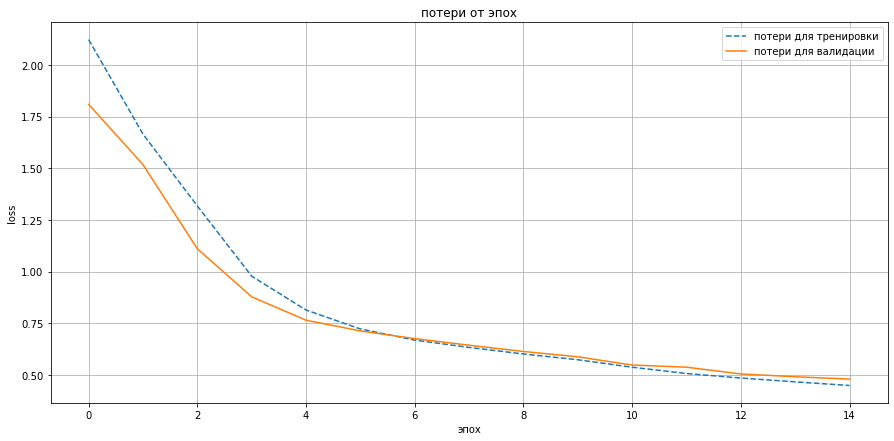

model_32_10_tanh_sgd_accuracy - 0.8357


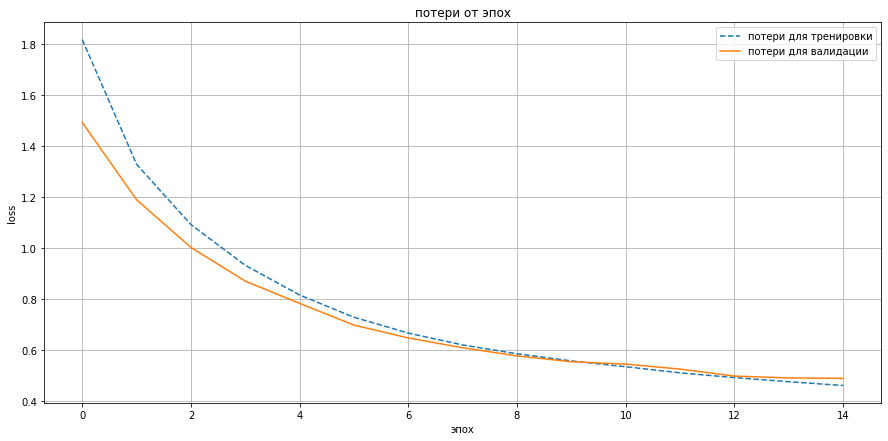

model_32_10_tanh_adam_accuracy - 0.8636


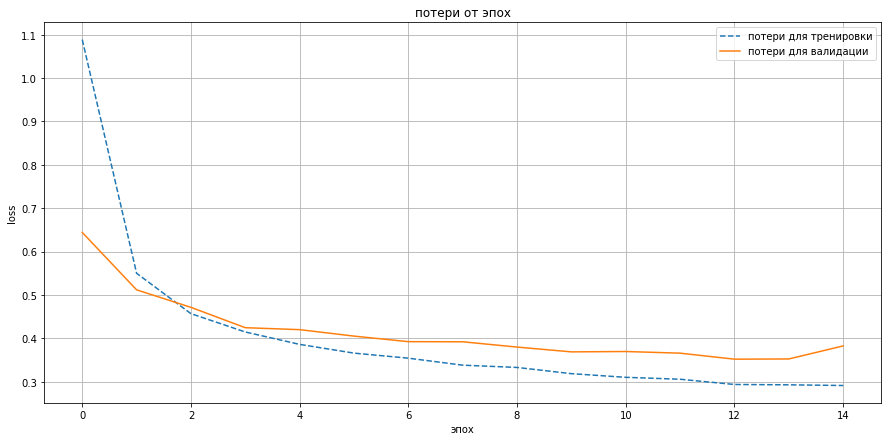

model_32_10_tanh_rmsprop_accuracy - 0.8671


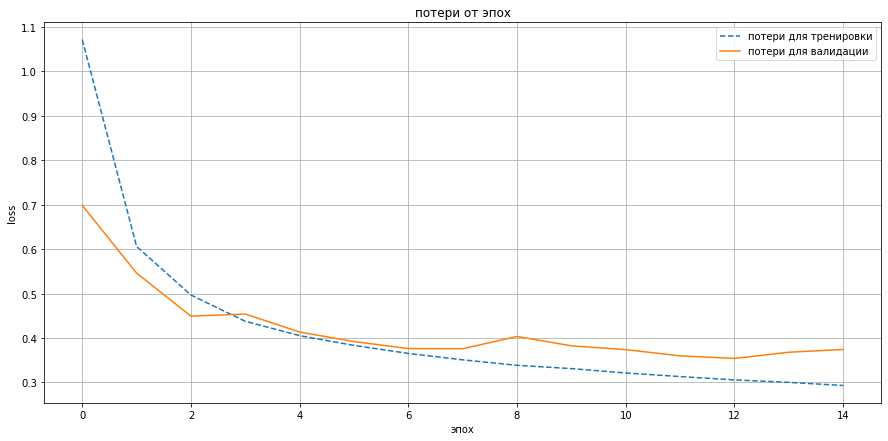

model_32_10_relu_sgd_accuracy - 0.7739


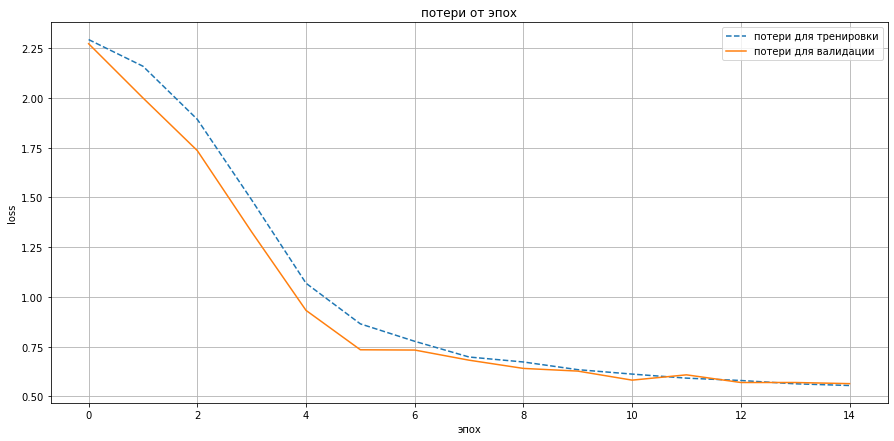

model_32_10_relu_adam_accuracy - 0.8472


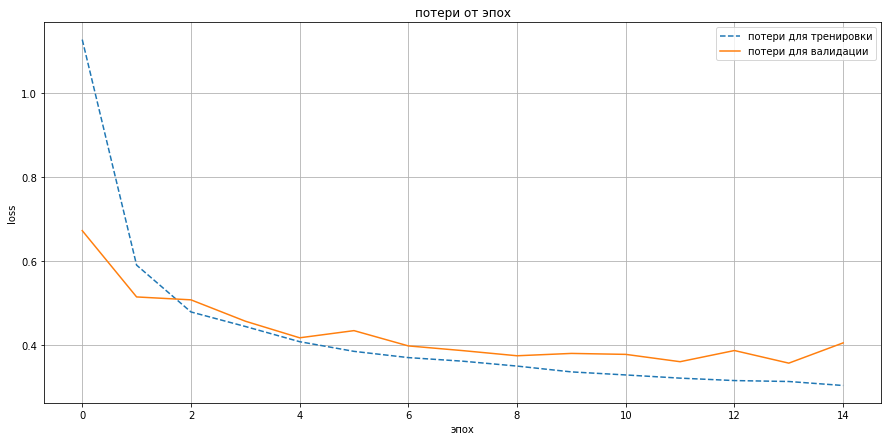

model_32_10_relu_rmsprop_accuracy - 0.8632


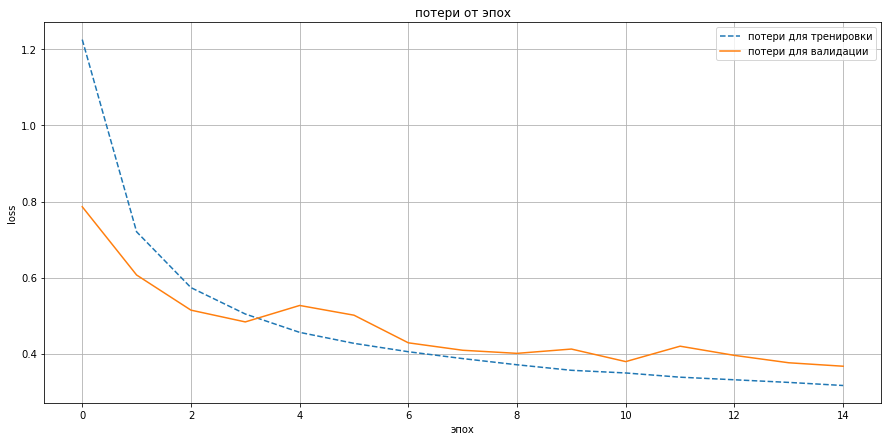

model_32_10_sigmoid_sgd_accuracy - 0.1


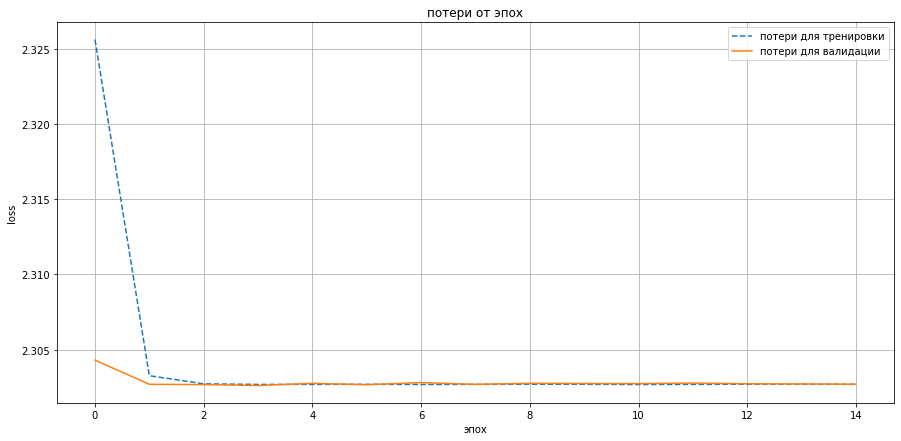

model_32_10_sigmoid_adam_accuracy - 0.1992


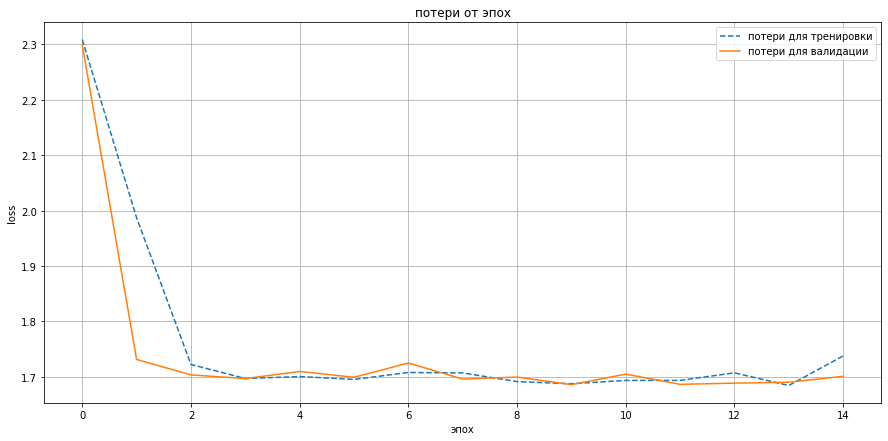

model_32_10_sigmoid_rmsprop_accuracy - 0.4557


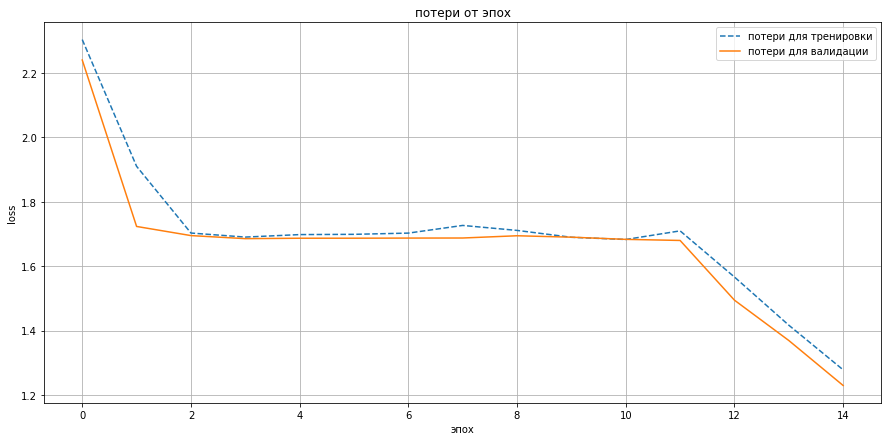

In [29]:
for m in list_model:
    print(f'{m[0]} - {m[4]}')
    plt.figure(figsize=(15,7))
    plt.plot(m[2].history['loss'], label = 'потери для тренировки', linestyle='dashed')
    plt.plot(m[2].history['val_loss'], label = 'потери для валидации')
    plt.xlabel('эпох')
    plt.ylabel('loss')
    plt.legend()
    plt.grid('On')
    plt.title('потери от эпох')
    plt.show()


In [24]:
list_model2 = []
for u in [32,64,128,256,512]:
    for l in [2]:
        for act in ["tanh"]:
            for opt in ["adam"]:
                for metr in [["accuracy"]]:
                    nn = NNCategoricalCrossentropy(train_images, train_labels, test_images, test_labels, u, l, act, opt, metr, 15, 128)
                                        
                    list_model2.append(nn)

model_32_2_tanh_adam_accuracy
Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 1.1243 - accuracy: 0.6586 - val_loss: 0.4817 - val_accuracy: 0.8318
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.4488 - accuracy: 0.8466 - val_loss: 0.4219 - val_accuracy: 0.8508
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3936 - accuracy: 0.8626 - val_loss: 0.3884 - val_accuracy: 0.8609
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3600 - accuracy: 0.8724 - val_loss: 0.3626 - val_accuracy: 0.8712
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3414 - accuracy: 0.8780 - val_loss: 0.3561 - val_accuracy: 0.8736
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3307 - accuracy: 0.8800 - val_loss: 0.3476 - val_accuracy: 0.8766
Epoch 7/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3103 - accuracy: 0.8874 - val_loss: 0.3505

375/375 [==============================] - 2s 4ms/step - loss: 0.6644 - accuracy: 0.7642 - val_loss: 0.3975 - val_accuracy: 0.8556
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3639 - accuracy: 0.8642 - val_loss: 0.3674 - val_accuracy: 0.8619
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3313 - accuracy: 0.8786 - val_loss: 0.3744 - val_accuracy: 0.8652
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3000 - accuracy: 0.8873 - val_loss: 0.3318 - val_accuracy: 0.8764
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2660 - accuracy: 0.8988 - val_loss: 0.3234 - val_accuracy: 0.8800
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2587 - accuracy: 0.9012 - val_loss: 0.3187 - val_accuracy: 0.8808
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2515 - accuracy: 0.9056 - val_loss: 0.3121 - val_accuracy: 0.8842
Epoch 8/15
375/37

In [27]:
for m in list_model2:
    print(m[0])
    print(f'Точность {m[4]}. Матрица ошибок:')
    print(m[3])
    print()

model_32_2_tanh_adam_accuracy
Точность 0.8701. Матрица ошибок:
[[834   0  20  61   4   0  74   1   6   0]
 [  1 957   2  31   3   0   5   0   1   0]
 [ 15   4 776  12 145   0  48   0   0   0]
 [ 22   6  13 909  25   1  20   0   3   1]
 [  0   2  78  39 841   2  34   0   3   1]
 [  0   0   0   1   0 921   0  46   5  27]
 [133   2 108  48 113   0 589   0   7   0]
 [  0   0   0   0   0  11   0 976   0  13]
 [  7   1   5   4   6   3   5   7 961   1]
 [  0   0   0   0   0   1   1  61   0 937]]

model_64_2_tanh_adam_accuracy
Точность 0.8782. Матрица ошибок:
[[840   1  10  18   3   1 117   0  10   0]
 [  5 956   4  25   4   0   4   0   2   0]
 [ 15   0 792  14 103   0  73   0   3   0]
 [ 43   3  10 886  20   1  29   0   8   0]
 [  2   0  86  49 792   0  61   0  10   0]
 [  1   0   1   0   0 965   0  19   2  12]
 [132   0  79  23  62   0 686   0  18   0]
 [  0   0   0   0   0  31   0 948   1  20]
 [  7   1   0   1   4   3   3   4 977   0]
 [  0   0   0   0   0  18   1  41   0 940]]

model_128_

model_32_2_tanh_adam_accuracy - 0.8701


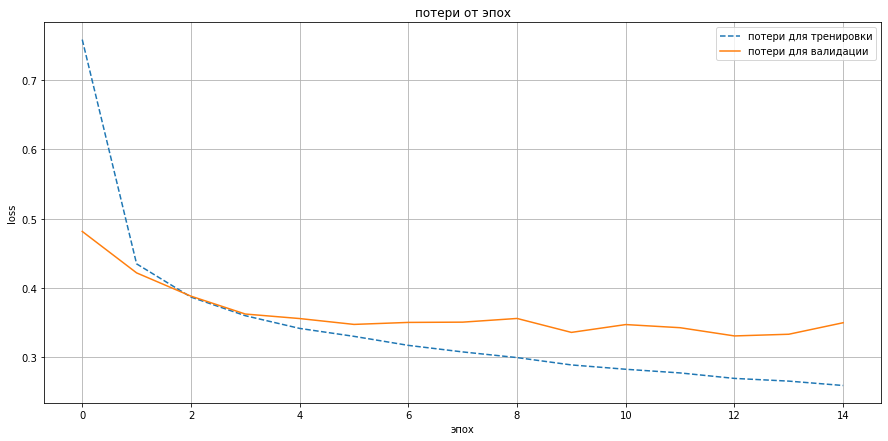

model_64_2_tanh_adam_accuracy - 0.8782


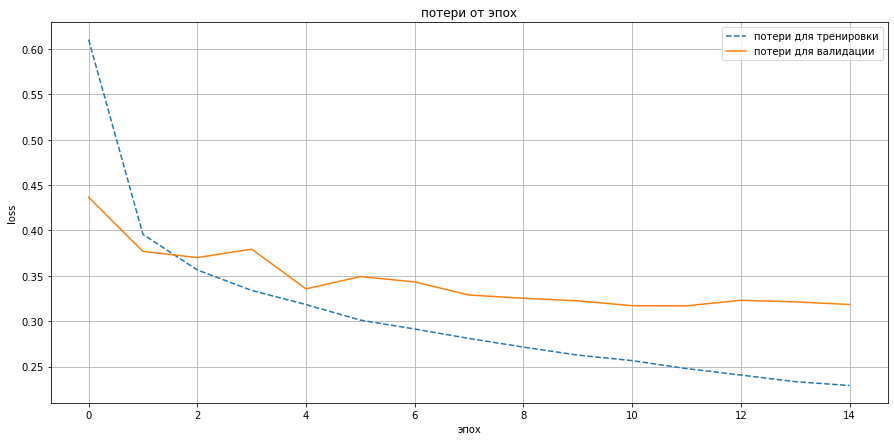

model_128_2_tanh_adam_accuracy - 0.8719


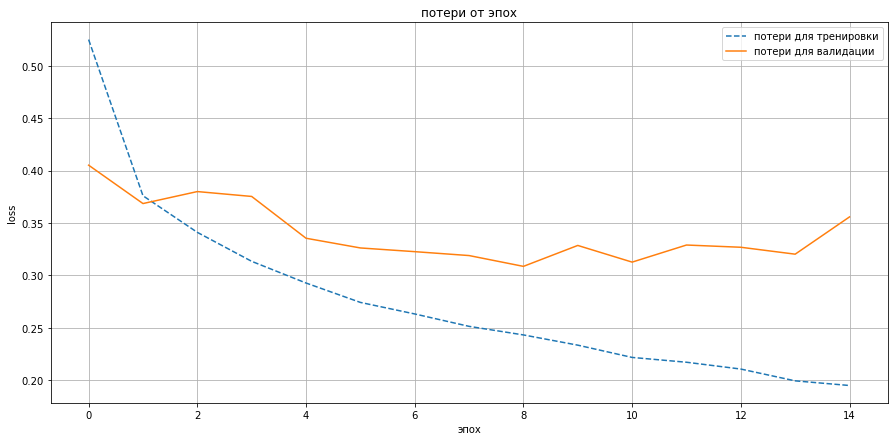

model_256_2_tanh_adam_accuracy - 0.8798


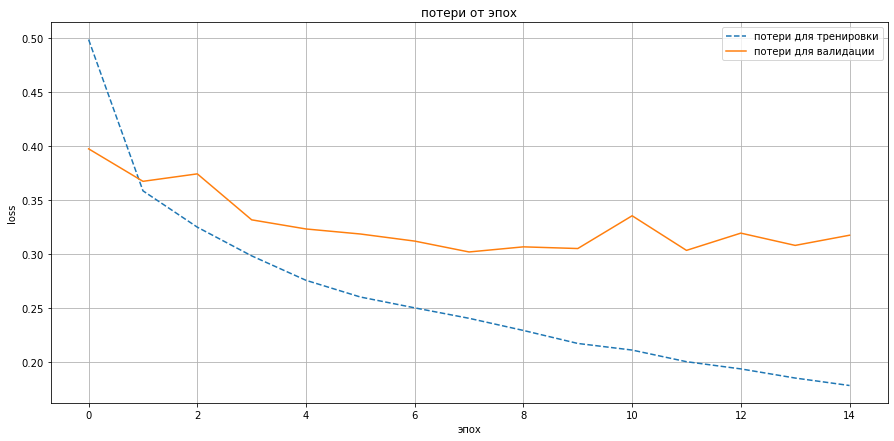

model_512_2_tanh_adam_accuracy - 0.8729


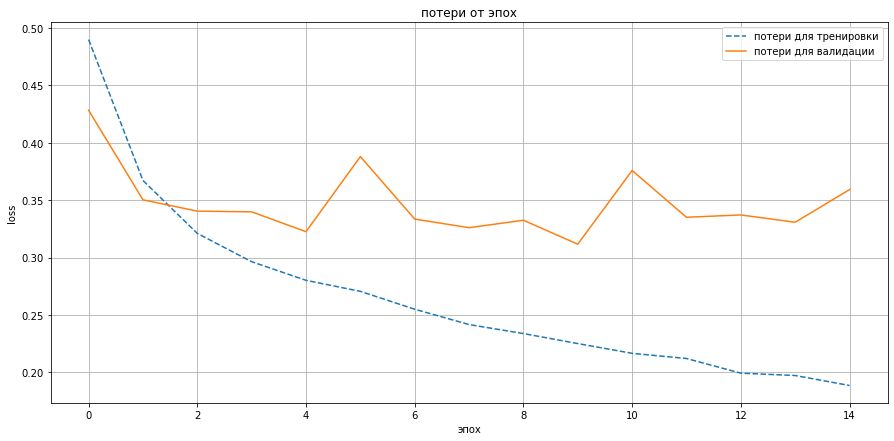

In [30]:
for m in list_model2:
    print(f'{m[0]} - {m[4]}')
    plt.figure(figsize=(15,7))
    plt.plot(m[2].history['loss'], label = 'потери для тренировки', linestyle='dashed')
    plt.plot(m[2].history['val_loss'], label = 'потери для валидации')
    plt.xlabel('эпох')
    plt.ylabel('loss')
    plt.legend()
    plt.grid('On')
    plt.title('потери от эпох')
    plt.show()


In [25]:
bestmodel2 = 0
bestacc2 = 0
for m in list_model2:
    if m[4] > bestacc:
        bestacc2 = m[4]
        bestmodel2 = m

print(f'Лучшая модель {bestmodel2[0]} c точностью {bestmodel2[4]}')

Лучшая модель model_256_2_tanh_adam_accuracy c точностью 0.8798


In [35]:
list_model3 = []
for u in [256]:
    for l in [2]:
        for act in ["tanh"]:
            for opt in ["adam"]:
                for metr in [["accuracy"]]:
                    nn = NNCategoricalCrossentropy(train_images, train_labels, test_images, test_labels, u, l, act, opt, metr, 50, 64)
                                        
                    list_model3.append(nn)

model_256_2_tanh_adam_accuracy
Epoch 1/50
750/750 [==============================] - 3s 4ms/step - loss: 0.6360 - accuracy: 0.7709 - val_loss: 0.4321 - val_accuracy: 0.8363
Epoch 2/50
750/750 [==============================] - 3s 3ms/step - loss: 0.3643 - accuracy: 0.8651 - val_loss: 0.4290 - val_accuracy: 0.8365
Epoch 3/50
750/750 [==============================] - 3s 3ms/step - loss: 0.3288 - accuracy: 0.8750 - val_loss: 0.3401 - val_accuracy: 0.8779
Epoch 4/50
750/750 [==============================] - 3s 3ms/step - loss: 0.3022 - accuracy: 0.8873 - val_loss: 0.3296 - val_accuracy: 0.8821
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2759 - accuracy: 0.8968 - val_loss: 0.3261 - val_accuracy: 0.8797
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2724 - accuracy: 0.8967 - val_loss: 0.3278 - val_accuracy: 0.8781
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2542 - accuracy: 0.9038 - val_loss: 0.336

model_256_2_tanh_adam_accuracy - 0.8964


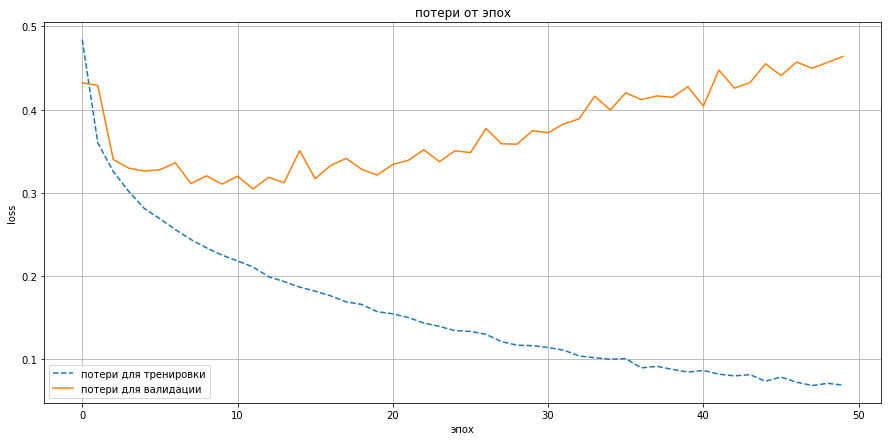

In [36]:
for m in list_model3:
    print(f'{m[0]} - {m[4]}')
    plt.figure(figsize=(15,7))
    plt.plot(m[2].history['loss'], label = 'потери для тренировки', linestyle='dashed')
    plt.plot(m[2].history['val_loss'], label = 'потери для валидации')
    plt.xlabel('эпох')
    plt.ylabel('loss')
    plt.legend()
    plt.grid('On')
    plt.title('потери от эпох')
    plt.show()

In [37]:
import pickle

In [41]:
list_model3[0][1].save_weights('model.h5')

<h2>Вывод<h2\>

Для данного датасета более подходящим окозалась нейросеть с гиперболический тангенсойдной актовацтонной функцией, оптимизацией ADAM, с 2 слоями. Но при этом использовалось 15 эпох и это повлекло к тму что не все модели проявили свой потенциал (видно по графикам). Далее было выявлено, что для выбранной модели необохдимо около 256 элементов в слое. При 50 эпохах данная модель показала 89.64% точность и свидетельствует по графику вероятней всего точность не привысит 91-92%.